Data Science Pipeline seen through liquor law vialations on College Campuses

This will be a tutorial on how to prepare data, perform exploratory analysis, and then properly analyze data through the data science cycle. But, we will be using data bout illegal activity on college campuses to do it.

The data set I have choosen to analyze is from the the US Department of Education Campus Safety and Security website. It was a direct download of multiple csv outlining illegal activity reports from college campuses in the DMV area from 2001-2015. I am only examining acredited four year Universities.

The sections will be divided as:

I. Data Curation, Parsing, and Management

II. Exploratory Data Analysis

III. Hypothesis testing and machine Learning

I. Data Curation, Parsing, and Management

Data curation, parsing, and management is the first step in the data science cycle. It is important to but the data in a format that can be used during analysis, is clean, and adheres to the tidy data principle. How can we gain insights from data if the data is messy, unorganized, and full of holes (NaNs)?

I first dropped data points that did not have enough information in them. All data on sexual assaunt have only recently been made avaliable. So unfortunately, there was not enough data to use to make gain real insights, and those columns were dropped. I also dropped columns from two of the tables that appeared multiple times, that way when I joined there wouldn't be a bunch of columns repetitive columns. In addition, I organized columns so that they would make more sense when joined together.

I then merged all the tables by their Department of Education ID and Year.


In [69]:
import pandas as pd
arrests = pd.read_csv("Arrests_On_campus.csv")
criminal_offenses = pd.read_csv("Criminal_Offenses_On_campus.csv")
disciplinary_actions = pd.read_csv("Disciplinary_Actions_On_campus.csv")
#dropping unnecessary columns
arrests.drop(['Campus ID', ' Campus Name'], axis=1, inplace = True)
criminal_offenses.drop(['Campus ID', 'Rape', 'Fondling', 'Statutory rape', 'Incest',
                                           'Institution name', 'Institution Size'], axis=1, inplace = True)
disciplinary_actions.drop(['Institution name','Campus ID',' Campus Name', 'Institution Size'], axis=1, inplace=True)

disciplinary_actions.rename(index=str, columns={"Illegal weapons possession": "Illegal weapons no arrest", 
                              "Drug law violations": "Drug law violations no arrest",
                             "Liquor law violations": "Liquor law violations no arrest"}, inplace = True)
arrests.rename(index=str, columns = {"Illegal weapons possession": "Illegal weapons arrest",
                                    "Drug law violations": "Drug law violations arrest",
                                    "Liquor law violations": "Liquor law violations arrest"}, inplace = True)
#joining tables together
merge1 = pd.merge(arrests, criminal_offenses, on=['Survey year', 'Unitid'])

college_illegal_activity = pd.merge(merge1, disciplinary_actions, on=['Survey year', 'Unitid'])

college_illegal_activity.head()

,Survey year,Unitid,Institution name,Institution Size,Illegal weapons arrest,Drug law violations arrest,Liquor law violations arrest,Campus Name,Murder/Non-negligent manslaughter,Negligent manslaughter,Sex offenses - Forcible,Sex offenses - Non-forcible,Robbery,Aggravated assault,Burglary,Motor vehicle theft,Arson,Illegal weapons no arrest,Drug law violations no arrest,Liquor law violations no arrest
0,2001,131159,American University,10692.0,0,0,0,Main Campus,0,0,5.0,0.0,2,2,33,3,0,4,141,306
1,2001,162007,Bowie State University,5181.0,0,0,0,Main Campus,0,0,2.0,3.0,0,5,15,2,0,1,2,0
2,2001,131283,Catholic University of America,5510.0,1,3,0,The Catholic University of America,0,0,2.0,0.0,5,1,3,10,1,0,2,219
3,2001,231712,Christopher Newport University,5388.0,0,0,0,Main Campus,0,0,1.0,0.0,0,0,1,1,0,0,22,96
4,2001,231624,College of William and Mary,7489.0,4,18,6,Main Campus,0,0,2.0,0.0,2,3,3,0,3,1,1,175


This is the dataset I ended with, it is approximately 736 different examples long, with 21 different parameters.

During the development process, it became clear that some of the Institution sizes were actually set to NaN, and 
I was not able to perform linear regression (but you'll see it soon in the tutorial!). So I came back and removed 
all institution Sizes that were NaN. This information was too vital to my analysis to make up or estimate.

In [154]:
todrop = []
for index, row in college_illegal_activity.iterrows():
    if np.isnan(row['Institution Size']):
        todrop.append(index)
college_illegal_activity.drop(todrop, inplace = True)

I. Exploratory Data Analysis

Now that there is a useable dataset, it's time to see what it is like.

Exploratory data analysis allows us to get a "feel" for the data. Using this analysis, it is possible to spot nuances, trends.

In this exploratory data analysis step, I think it is imiportant to initially begin with the aspects of the data that interest you, then continue to build upon insights found. Also, it is important look at the data different ways; by categories, such as each University, a numeric scale, the University size size, or time series, the overall year.

I am interested in looking further at the total liquor and drug offenses on college campuses, since college is known as a place where young adults are left unsupervised and surrounded by illegal recreational activities. For more information read https://pubs.niaaa.nih.gov/publications/CollegeFactSheet/CollegeFactSheet.pdf


There are many ways I could look at this information, by year, by college, and by different crime. My initial thought is to analyze the offenses that have discipline actions and arrests at these college.


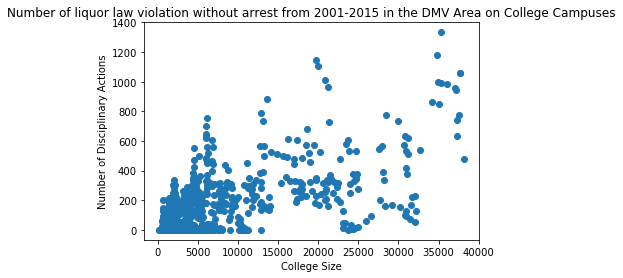

In [261]:
import matplotlib.pyplot as plt
plt.scatter(college_illegal_activity['Institution Size'],college_illegal_activity['Liquor law violations no arrest'])
plt.ylabel('Number of Disciplinary Actions')
plt.xlabel('College Size')
plt.title("Number of liquor law violation without arrest from 2001-2015 in the DMV Area on College Campuses")
plt.show()

This shows that there are a large amount of law violations school disciplinary actions as the schools increase in size

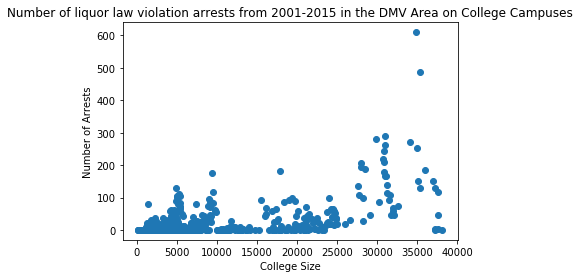

In [262]:
plt.scatter(college_illegal_activity['Institution Size'], college_illegal_activity['Liquor law violations arrest'])
plt.ylabel('Number of Arrests')
plt.xlabel('College Size')
plt.title("Number of liquor law violation arrests from 2001-2015 in the DMV Area on College Campuses")
plt.show()

It is interesting to see that there are significantly more disciplinary actions than arrests for liquor law violations

Now I want to analyze this data along with the amount of time taken for actions. 
To get an understanding of the data on a time series scale, I am mapping by year and comparing different types of violations, drugs and liquor, and non arrest and arrest charges.

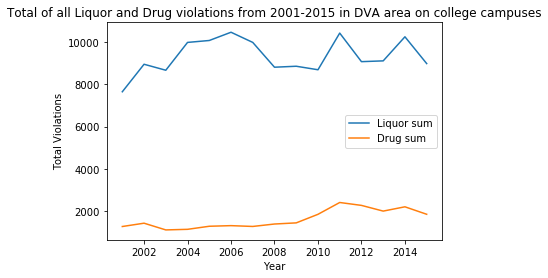

In [43]:
import numpy as np
activity_by_year = college_illegal_activity.groupby(by = 'Survey year', as_index=False).aggregate(
    {'Liquor law violations arrest':np.sum,'Liquor law violations no arrest':np.sum, 
     'Drug law violations no arrest':np.sum, 'Drug law violations arrest':np.sum})
#sums
activity_by_year['Liquor sum'] = activity_by_year['Liquor law violations arrest'] + activity_by_year['Liquor law violations no arrest']
activity_by_year['Drug sum'] = activity_by_year['Drug law violations arrest'] + activity_by_year['Drug law violations no arrest']
plt.plot(activity_by_year['Survey year'], activity_by_year['Liquor sum'])
plt.plot(activity_by_year['Survey year'], activity_by_year['Drug sum'])
plt.legend()
plt.ylabel('Total Violations')
plt.xlabel('Year')
plt.title("Total of all Liquor and Drug violations from 2001-2015 in DVA area on college campuses")
plt.show()

Now, instead of liquor v. drug violations, I want to look at a comparison of non arrest and arrest violations

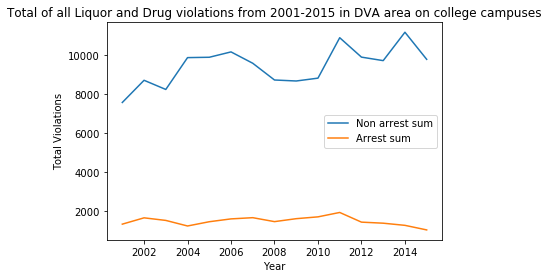

In [47]:
activity_by_year['Non arrest sum'] = activity_by_year['Drug law violations no arrest'] + activity_by_year['Liquor law violations no arrest']
activity_by_year['Arrest sum'] = activity_by_year['Drug law violations arrest'] + activity_by_year['Liquor law violations arrest']
plt.plot(activity_by_year['Survey year'], activity_by_year['Non arrest sum'])
plt.plot(activity_by_year['Survey year'], activity_by_year['Arrest sum'])
plt.legend()
plt.ylabel('Total Violations')
plt.xlabel('Year')
plt.title("Total of all Liquor and Drug violations from 2001-2015 in DVA area on college campuses")
plt.show()

But, it is important to sandardize the amount of violations and size of school. Because it is easy to deduce that the bigger a school, the more violations they can have.

So, I want to do comparisons between schools with standardized data. I want to put the total of non arrest liquor offenses for each school on a unit-less scale.

I will use the proportion of how many students received both non arrest offence violations and arrest violations out of the student population of each university, and compare the percentages between different Universities. 

In [158]:
for index, row in activity_by_year.iterrows():
    year = row['Survey year']
    for j_index, row2 in college_illegal_activity.iterrows():
        if row2['Survey year'] == year:
            #creating percentage
            add = (row2['Liquor law violations no arrest'] + row2['Liquor law violations arrest'])
            percent = (add/row['Liquor sum'])*100
            college_illegal_activity.set_value(j_index,'percentage violations',percent)
            
myIter = 0
#printing out first couple examples for reference
for index, row in college_illegal_activity.iterrows():
    print (row['Institution name'] +" percentage violations " + str(row['percentage violations']))
    myIter = myIter + 1
    if myIter == 6:
        break

American University percentage violations 4.00156924284033
Bowie State University percentage violations 0.0
Catholic University of America percentage violations 2.8638681836014124
Christopher Newport University percentage violations 1.2553942722636329
College of William and Mary percentage violations 2.3669412841637243
Coppin State University percentage violations 0.07846214201647705


Now the information is in a scale that allows them to better relate!

The visual will be more representative of how the data points compare.

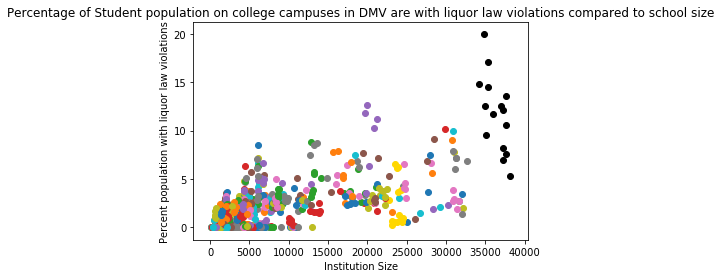

In [90]:
for index,row in college_illegal_activity.iterrows():
    #I am adding different colors for University of Maryland and Unversity of Virginia because I am personally
    #curious about how they compare to other schools.
    if row['Institution name'] == "University of Maryland-College Park":
        plt.scatter(row['Institution Size'], row['percentage violations'],
                    label = "University of Maryland-College Park", color = 'black')
    elif row['Institution name'] == "University of Virginia-Main Campus":
        plt.scatter(row['Institution Size'], row['percentage violations'],
                    label = "University of Virginia", color = 'gold')
    else:
        plt.scatter(row['Institution Size'], row['percentage violations'])

plt.ylabel('Percent population with liquor law violations')
plt.xlabel('Institution Size')
plt.title("Percentage of Student population on college campuses in DMV are with liquor law violations compared to school size")
plt.show()

This graph hints at a relation between institution size and percent of population with liquor violations, so lets explore this further with hypothesis testing, machine learning, and analysis.

Out of curiosity as a Terp, I made all University of Maryland points black.

III. Analysis, hypothesis testing, and machine learning

Based off my exploratory data analysis and visualization, I want to see if the bigger a school, the more likely it is that people will get liquor related violations.

I want to look into this because the more people that are around, I believe that the more likely it is that students will participate in activites they normally wouldn't, specifically activities that would lead to law violations. This goes along with the group polarization theory, that members of group will do more extreme things than they would do outside of the group.

I now want to test for a hypothesis: the larger a University, the greater percentage of the students will have liquor violations. This is my null hypothesis, and my alternative is the opposite of the null. So my alternative hypothesis is that University size has no affect no percentage of population with liquor law violations. 

I want to begin with doing linear regression, and see if there is a correlation between the two variables, and plot the regression line.

Linear regression is a type of analysis that allows you to see the correlation of two different variables. If the correlation is positive they increase at the same rate, if it is negative, the decrease together. The correlation can be in the range of -1 to 1. It is important to remember that this correlation does not mean causation.

In [160]:
from sklearn import *
regData = linear_model.LinearRegression()
y = college_illegal_activity['percentage violations']
x = college_illegal_activity['Institution Size']

#x has to be reshaped when performing linear regression in order to wrok within the model
test = college_illegal_activity['percentage violations']
regData.fit(x.values.reshape(-1,1), test)
print('Coefficients: \n', regData.coef_)

Coefficients: 
 [ 0.00020168]


While there was a positive correlation - I am surprised it isn't bigger. I'm going to make a graph of the regresion line and see what I am dealing with!

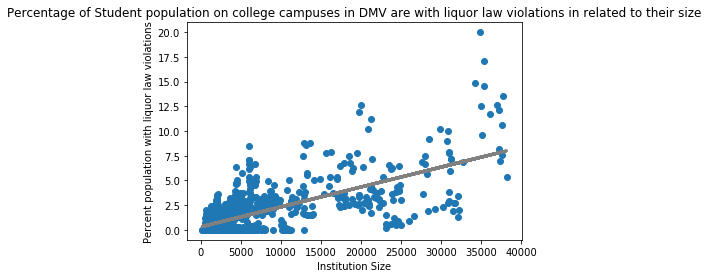

In [264]:
plt.scatter(college_illegal_activity['Institution Size'],
            college_illegal_activity['percentage violations'])
plt.plot(x.values.reshape(-1,1), regData.predict(x.values.reshape(-1,1)), color='gray', linewidth=3)
plt.ylabel('Percent population with liquor law violations')
plt.xlabel('Institution Size')
plt.title("Percentage of Student population on college campuses in DMV are with liquor law violations in related to their size")

plt.show()

While the correlation is not large, it is clear with the regression line that there is one.

Now I will apply another analysis technique - machine learnnig. 

In machine learing, the one of the most important things you can learn is: split up your test and training dating, and never let them interact!

For these machine learning problems, the y output needs to be a binary 0 or 1 that corresponds to the hypothesis. I did not have a binary y value, so I created one. 

So I will be creating y for "high" or "low" percentage of student violations. This boolean will represent weather the percentage falls above or on the mean of percentage of violations per University, which will be 1, or under, which will correspond with 0.

In [233]:
percentageMean = np.mean(college_illegal_activity['percentage violations'])
for index, row in college_illegal_activity.iterrows():
    if percentageMean < row['percentage violations']:
        college_illegal_activity.set_value(index,'high_amount',0)
    else: 
        college_illegal_activity.set_value(index,'high_amount',1)

train_data = college_illegal_activity[:350]
test_data = college_illegal_activity[350:]

I decided to use knn because it is a simple but powerful machine learning classifier.
KNN is an algorithm that computes the euclidean distance of the data point currnetly being classified. Then it takes the majority vote of class labels among the k-nearest neighbors.

I will separate my train and test data, the Institution size and weather or not the percentage of violations is less than or greater than the mean.

In [266]:
#knn section
from sklearn import *
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

x_train = train_data[['Institution Size']]
x_test = test_data[['Institution Size']]
y_train = train_data[['high_amount']]
y_test = test_data[['high_amount']]

# model
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=4)

Now that there is a model, it is important to evaluate the model. Cross validation allows us to test every data point at least once in subsets. This gives us a better idea of if we can actually trust our model, and gives us an idea of how it will perform. We will be splitting our training data into subsets and performing cross validation 10 times.

In [265]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(knn, x_train, y_train, cv=kfold, scoring="accuracy")
accuracy_score(y_test,knnPredictpred)
print (cv_results)

[ 0.8         0.74285714  0.82857143  0.8         0.85714286  0.82857143
  0.71428571  0.77142857  0.74285714  0.74285714]


/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1

These scores lead us to believe that the model will perform well on this data set - so lets try it out!

In [259]:
knn.fit(x_train, y_train)
knnPredict = knn.predict(x_test)
print("Accuracy score " + str(accuracy_score(y_test, knnPredict)))
print ("Classification report below")
print(classification_report(y_test, knnPredict))

Accuracy score 0.682326621924
Classification report below
             precision    recall  f1-score   support

        0.0       0.57      0.74      0.64       172
        1.0       0.80      0.65      0.71       275

avg / total       0.71      0.68      0.69       447



The model did pretty well! After training on the train data, the knn classifier was able to predict the testing data with about 68% accuracy.

When averaging between the two classifications, it is clear that the model had higher recall than precision. Recall is the # of true positives / (# true positives + # false negatives). This means that the model was more inclusive.

Overall, the model did perform well.

After performing analysis, I feel comforable saying that the null hypothesis is true. There is definitely a relationship between larger schools and higher percentages of students with liquor violations.

Thank you for following this tutorial! Learning about data science and data analysis cycle is very interesting. Data science is both very powerful, and very interesting.

Additional Readings:

Tidy Data Principle Paper: http://vita.had.co.nz/papers/tidy-data.html 
    (Although the paper focuses on R, it still has valuable information about how data should be organized!)
Linear Regression in Python: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
    (The python machine learning library has a great tutorial on how to use linear models - it definitely
    helped me when I got stuck)
Information about KNN:http://ciml.info/
    (A Course in Machine Learning is a great textbook I have used to learn about different classifiers)
Information about cross validation: https://www.cs.cmu.edu/~schneide/tut5/node42.html
    Information from the Carnegie Mellon CS department. 


Thanks again!